# Plotting using `seaborn`

### Install `seaborn`

- In `cmd`: `pip install seaborn`
- In `Jupyter Notebook`: `!pip install seaborn`

In [1]:
# uncomment this line to install seaborn
# !pip install seaborn

In [2]:
# check version
import seaborn as sns

sns.__version__

'0.13.2'

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

# data
df = pd.read_csv('store_sales.csv')
df.head()

,Month,Product,Units_Sold,Revenue
0,Jan,Laptop,152,252168
1,Jan,Smartphone,398,594612
2,Jan,Tablet,156,202020
3,Jan,Accessory,238,296072
4,Feb,Laptop,152,48792


# `catplot` - categorical plots / Biểu đồ phân loại


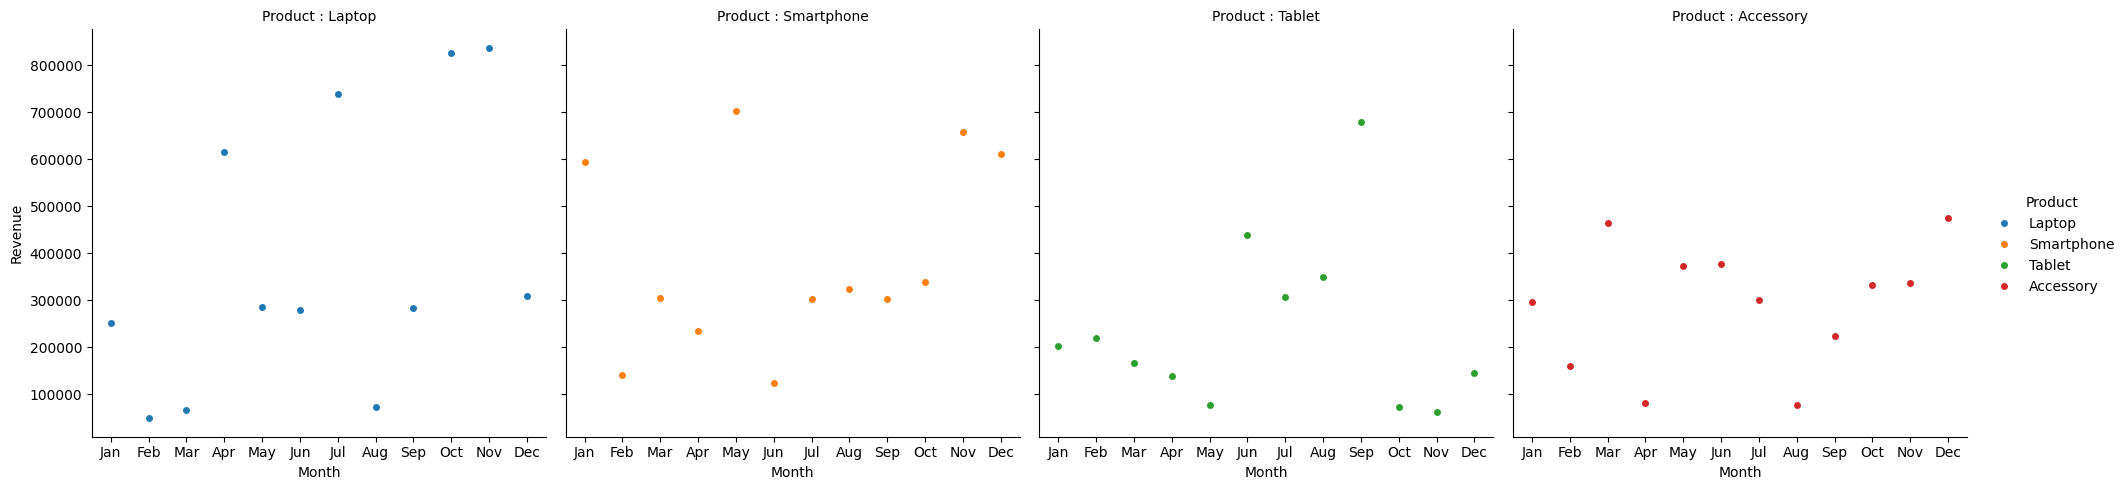

In [4]:
g = sns.catplot(data=df, x='Month', y='Revenue', aspect=1, col='Product', hue='Product')
# data: DataFrame
# x: Biến phân loại (cột nào đó trong data)
# y: số liệu
# hue=columnName -> mỗi giá trị của trong columnName có 1 màu
# kind: loại biểu đồ:
    # 'strip' - default -> scatter
    # 'swarm' -> giống strip nhưng tránh overload
    # 'box' -> box plot
    # 'boxen' -> box plot mở rộng
    # 'violin' -> violin plot
    # 'point' -> point + line
    # 'bar' -> bar chart
    # 'count' -> đếm số lượng mỗi nhóm
# col, row='columnName' -> tạo các subplot, mỗi subplot unwngs với 1 column name (phân loại biểu đồ theo thuộc tính nào đó của df)
# height: chiều cao mỗi subplot
# aspect: tỉ lệ rộng/cao

# ---- set the labels ------
# 
# .catplot() trả về FacetGrid (tương đối giống axes của .subplots()) -> g
# g.ax -> trục chính nếu chỉ có 1 plot
# g.axes -> mảng các subplot (nếu có nhiều subplot)
# g.set_axis_labels(x, y) # tên trục x, tên trục y
# g.set_xticklabels([]) ->  đặt tên cho các giá trị (cột) của trục x
# g.set_titles() # tên chart 
    # '{col_val}', '{col_name}' -> tên cột (col=) và giá trị của col_var ứng với chart đó
    # '{row_var}', '{row_name}' -> tên hàng (row=) và giá trị của row_var ứng với chart
# g.savefig('out.png') -> export .png

g.set_titles('{col_var} : {col_name}')


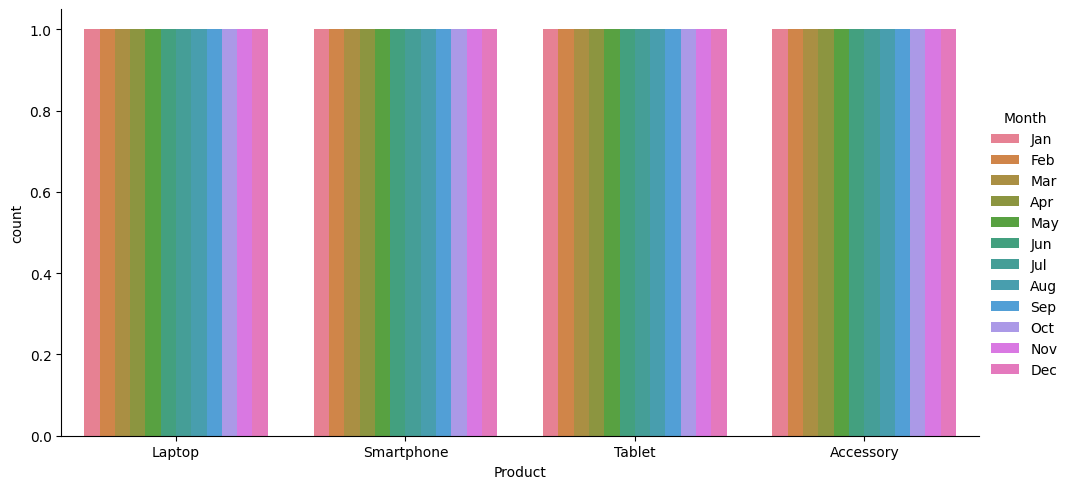

In [5]:
sns.catplot(data=df, x='Product', kind='count', hue='Month', aspect=2) 
# count không có y
# đếm số lượng từng loại trong x

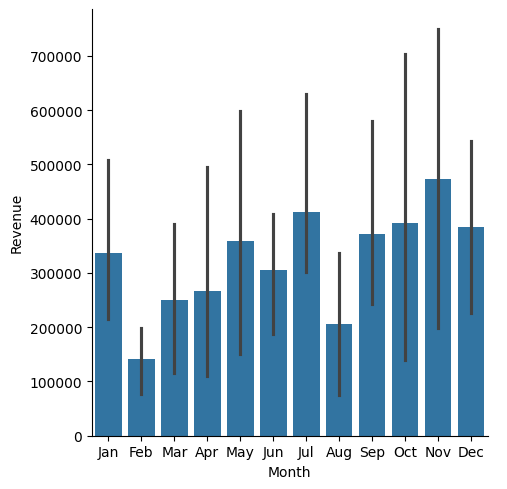

In [6]:
# errorbar (ci): mức độ bất định (khoảng tin cậy) quanh giá trị trung bình 
# => giá trị thực sự có thể ~% (giá trị errorbar) nằm trong khoảng đó
# errorbar='ci' ->95%
# errorbar=('ci', 80) -> khoảng tin cậy 80%
# errorbar='sd' -> vẽ theo độ lệch chuẩn
# errorbar=None -> không vẽ errorbar
sns.catplot(kind='bar', data=df, x='Month', y='Revenue') 
# 

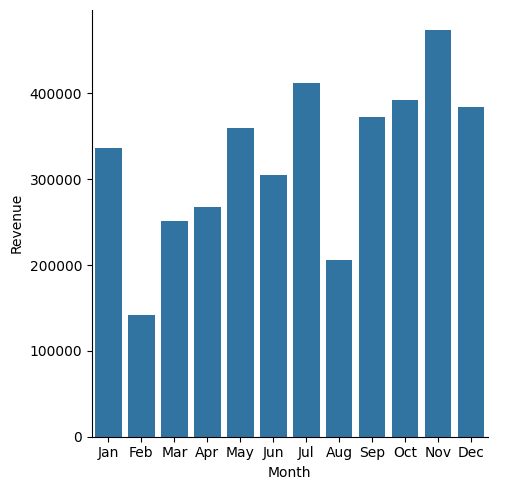

In [7]:
# tắt thanh error bar:
sns.catplot(kind='bar', data=df, x='Month', y='Revenue', errorbar=None) 

# `lmplot` - Scatter plot + Linear Regression Line

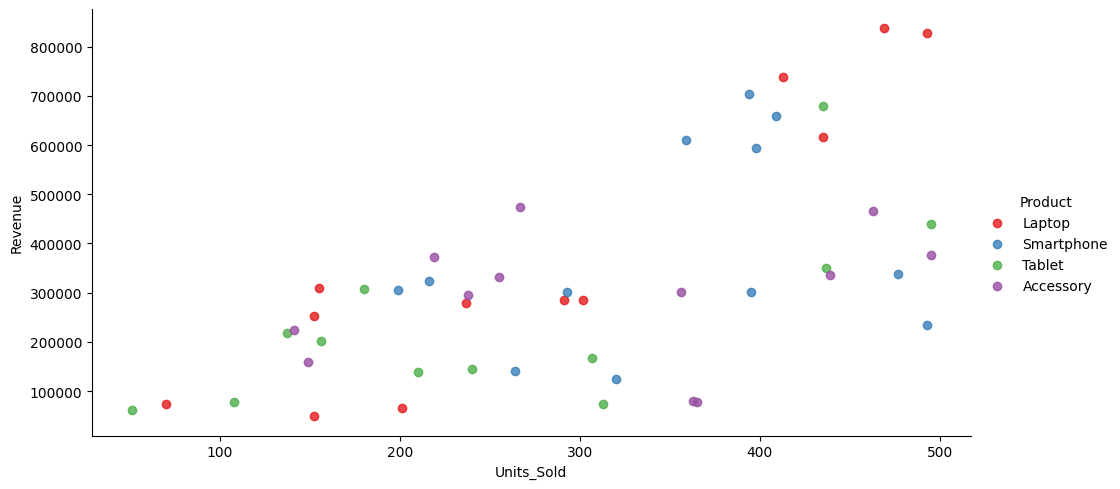

In [8]:
# mục đích -> vẽ scatter plot giữa 2 biến số x, y và thêm đường hồi quy tuyến tínhar
sns.lmplot(data=df, 
           x='Units_Sold', y='Revenue', 
           hue='Product', palette='Set1', 
           aspect=2,
           line_kws={'ls': '--'},
           fit_reg=False
          )
# data: DataFrame
# x, y -> tên cột trong df chọn làm trục x, y # phải là int hoặc float
# hue -> phân nhóm, tạo màu mỗi nhóm
# row, col -> chia subplot theo cột, hàng
# height
# aspect
# errorbar
# scatter_kws : dict -> tùy chỉnh point: s, color, alpha
# line_kws : dict -> tùy chỉnh line (color, ls, lw,. .. )
# markers
# fit_reg=True/False -> hiển thị đường line

# `swarmplot` - categorical scatterplot with nonoverlapping points / biểu đồ điểm danh mục không chồng lấn (trùng nhau sẽ được dịch sang để nhìn rõ)


In [9]:
import numpy as np
df = pd.DataFrame({
    'Product': np.random.choice(['LaptopX', 'TabletY', 'SmartphoneZ'], size=20),
    'Revenue': np.random.choice([120, 200, 100], size=20),
    'Month': np.random.choice(['Jan', 'Feb'], size=20)
})
df

,Product,Revenue,Month
0,LaptopX,120,Jan
1,LaptopX,200,Feb
2,SmartphoneZ,120,Feb
3,SmartphoneZ,200,Feb
4,LaptopX,120,Jan
5,LaptopX,200,Jan
6,LaptopX,100,Jan
7,LaptopX,100,Jan
8,LaptopX,120,Jan
9,SmartphoneZ,100,Feb


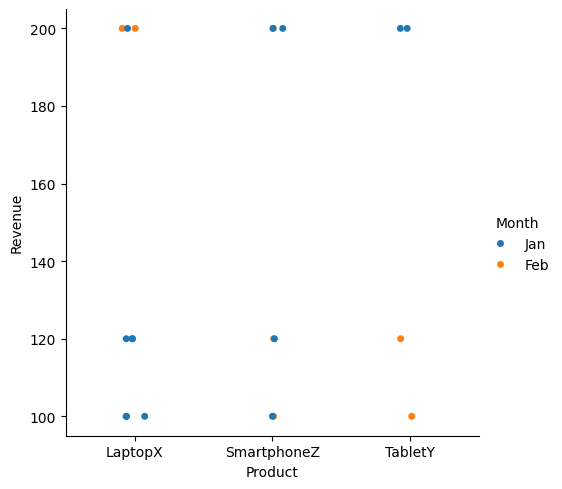

In [10]:
# scatter plot
sns.catplot(data=df, x='Product', y='Revenue', hue='Month')

Text(0.5, 23.52222222222222, 'Product name')

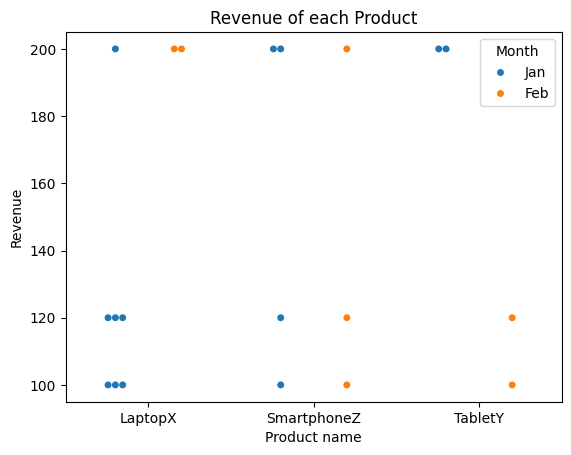

In [11]:
# swarmplot
g = sns.swarmplot(data=df, x='Product', y='Revenue', hue='Month', dodge=True)
# dodge: chia từng nhóm hue chồng lên nhau
# tức là mỗi cột đc chia thành nhiều cột nhỏ ứng với các nhóm
# uncomment to view the difference
# sns.swarmplot(data=df, x='Product', y='Revenue', hue='Month', dodge=False)

# set_title, set_xlabel, set_ylabel
g.set_title('Revenue of each Product')
g.set_xlabel('Product name')